In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# os.chdir("..")
os.chdir('/tmp2/ivy8792/deepsvg_reproduce')

In [3]:
from deepsvg.svglib.geom import Point
from deepsvg.svglib.svg import SVG
from deepsvg.svglib.svg_path import SVGPath
from deepsvg.svglib.utils import to_gif

from deepsvg.difflib.tensor import SVGTensor
from deepsvg.difflib.utils import *
from deepsvg.difflib.loss import *

In [4]:
import torch.optim as optim
import IPython.display as ipd
from moviepy.editor import ImageClip, concatenate_videoclips, ipython_display
from svgpathtools import svg2paths, wsvg

In [19]:
svg = SVG.load_svg("docs/imgs/ocean_color.svg").normalize().zoom(0.9).canonicalize()  # ocean_color, bell

In [20]:
svg_target, group_svg_target = svg.to_tensor()

new_group = []
for g in group_svg_target:    
    new_group.append(SVGTensor.from_data(g))

group_len: 12


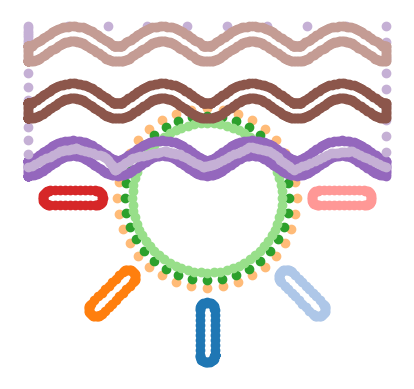

In [21]:
colors = [plt.cm.tab20(x) for x in range(20)]
points = []
for i, g in enumerate(new_group):
    p_target = g.sample_points(n=10)
    points += p_target.tolist()
    plot_points(p_target, colors[i], show_color=False)